# <hr style='color:blue'/>
# <h4 style='color:crimson;font-size:20px;text-align:center'>------------------imports------------------</h4>
# <hr style='color:blue'/>

In [25]:
import pandas as pd
import seaborn as sb
from googletrans import Translator
import time

# <hr style='color:blue'/>
# <h4 style='color:crimson;font-size:20px;text-align:center'>------------------red CSV file and drop first column------------------</h4>
# <hr style='color:blue'/>

In [4]:
df = pd.read_csv('C:\\csv-data-collect\\github-2023_2.csv',index_col=0)

# <hr />
# <p style='color:crimson;text-align:center;font-size:20px'>Scheme to describe a process</p>
# <hr />

# <img src='https://cdn.discordapp.com/attachments/922505547096408077/1121716104461557850/Road-map.png' />
#

# <hr style='color:blue'/>
# <h4 style='color:crimson;font-size:20px;text-align:center'>------------------duplicates------------------</h4>
# <hr style='color:blue'/>

In [5]:
dup_shape = df[df.duplicated()].shape
print(f'\x1b[31m\"Duplicate shape:{dup_shape}:\"\x1b[0m')

"Duplicate shape:(683, 16):"


In [23]:
dup_shape = df.drop_duplicates(inplace=True)
print(f'\x1b[31m\"Duplicate shape:{dup_shape}:\"\x1b[0m')

"Duplicate shape:None:"


# <hr style='color:blue'/>
# <h4 style='color:crimson;font-size:20px;text-align:center'>------------------Languages------------------</h4>
# <hr style='color:blue'/>

In [22]:
print('\x1b[31m\"--------------------------------List of languages:--------------------------------\"\x1b[0m')
len(df['language'].unique().tolist())

"--------------------------------List of languages--------------------------------"


310

In [8]:
Null_language = df.loc[df['language'].isna()].shape
print(f'\x1b[31m\"Language with value of Null:{Null_language}:\"\x1b[0m')

"Language with value of Null:(18585, 16):"


In [9]:
Null_language = df.loc[df['language'].isna()].index
Null_language = df.drop(Null_language,inplace=True)
print(f'\x1b[31m\"Language with value of Null:{Null_language}:\"\x1b[0m')

"Language with value of Null:None:"


# <hr style='color:blue'/>
# <h4 style='color:crimson;font-size:20px;text-align:center'>------------------Check for Outliers------------------</h4>
# <hr style='color:blue'/>

"Display Outliers using boxplot:"


<Axes: >

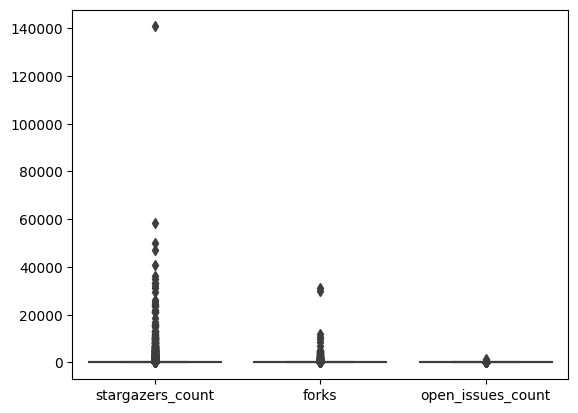

In [10]:
print(f'\x1b[31m\"Display Outliers using boxplot:\"\x1b[0m')
sb.boxplot(df[['stargazers_count','forks','open_issues_count']])

In [11]:
print(f'\x1b[31m\"Implementation For Stars:\"\x1b[0m')
Q1 = df['stargazers_count'].quantile(0.25)
Q3 = df['stargazers_count'].quantile(0.75)
IQR = Q3 - Q1


Lower_Whisker = Q1 - (1.5 * IQR)
Upper_Whisker = Q3 + (1.5 * IQR)

print(f'\x1b[31m\"Lower Whisker:{Lower_Whisker}:\"\x1b[0m')
print(f'\x1b[31m\"Lower Whisker:{Upper_Whisker}:\"\x1b[0m')

df.loc[(df['stargazers_count'] < Lower_Whisker)|(df['stargazers_count'] > Upper_Whisker)].shape


"Implementation For Stars:"
"Lower Whisker:-5.0:"
"Lower Whisker:19.0:"


(17608, 16)

In [12]:
print(f'\x1b[31m\"Implementation For Forks:\"\x1b[0m')
Q1 = df['forks'].quantile(0.25)
Q3 = df['forks'].quantile(0.75)
IQR = Q3 - Q1


Lower_Whisker = Q1 - (1.5 * IQR)
Upper_Whisker = Q3 + (1.5 * IQR)

print(f'\x1b[31m\"Lower Whisker:{Lower_Whisker}:\"\x1b[0m')
print(f'\x1b[31m\"Upper Whisker:{Upper_Whisker}:\"\x1b[0m')

df.loc[(df['forks'] < Lower_Whisker)|(df['forks'] > Upper_Whisker)].shape


"Implementation For Forks:"
"Lower Whisker:-3.0:"
"Upper Whisker:5.0:"


(12654, 16)

In [13]:
print(f'\x1b[31m\"Implementation For Open Issues:\"\x1b[0m')
Q1 = df['open_issues_count'].quantile(0.25)
Q3 = df['open_issues_count'].quantile(0.75)
IQR = Q3 - Q1


Lower_Whisker = Q1 - (1.5 * IQR)
Upper_Whisker = Q3 + (1.5 * IQR)

print(f'\x1b[31m\"Lower Whisker:{Lower_Whisker}:\"\x1b[0m')
print(f'\x1b[31m\"Upper Whisker:{Upper_Whisker}:\"\x1b[0m')

df.loc[(df['open_issues_count'] < Lower_Whisker)|(df['open_issues_count'] > Upper_Whisker)].shape

"Implementation For Open Issues:"
"Lower Whisker:-1.5:"
"Upper Whisker:2.5:"


(13582, 16)

# <hr style='color:blue'/>
# <h4 style='color:crimson;font-size:20px;text-align:center'>------------------Standardize Formats------------------</h4>
# <hr style='color:blue'/>

In [14]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])
df['pushed_at'] = pd.to_datetime(df['pushed_at'])
print('\x1b[31m\"--------------------------------created--------------------------------\"\x1b[0m')
print(df['created_at'].dt.date.head(2))
print('\x1b[31m\"--------------------------------updated--------------------------------\"\x1b[0m')
print(df['updated_at'].dt.date.head(2))
print('\x1b[31m\"--------------------------------pushed--------------------------------\"\x1b[0m')
print(df['pushed_at'].dt.date.head(2))

"--------------------------------created--------------------------------"
0    2023-01-01
2    2023-01-01
Name: created_at, dtype: object
"--------------------------------updated--------------------------------"
0    2023-06-21
2    2023-06-20
Name: updated_at, dtype: object
"--------------------------------pushed--------------------------------"
0    2023-06-20
2    2023-06-20
Name: pushed_at, dtype: object


In [29]:
print('\x1b[31m\"--------------------------------Translate--------------------------------\"\x1b[0m')

translator = Translator()

def translate_desc(text):
    if text == 'No Description' or translator.detect(text=text).lang =='en':
        return text
    else:
        time.sleep(1)
        return translator.translate(text=text,dest='ar').text

df['description'] = df['description'].apply(translate_desc)

"--------------------------------Translate--------------------------------"


'اسدي'

# <hr style='color:blue'/>
# <h4 style='color:crimson;font-size:20px;text-align:center'>------------------Correct Errors------------------</h4>
# <hr style='color:blue'/>

In [16]:
import re
print('\x1b[31m\"--------------------------------remove special charachters and emojis--------------------------------\"\x1b[0m')

def clean_description(description):
    if isinstance(description, str):
        return re.sub(r'[\U0001F000-\U0001FFFF]|[\U00010000-\U0010FFFF]|[\u2600-\u26FF]|\uD83C[\uDF00-\uDFFF]|\uD83D[\uDC00-\uDE4F]|\uD83D[\uDE80-\uDEFF]|\uD7C9[\uDC00-\uDDFF]|\u2728', '', description)
    else:
        return description
df['description'] = df['description'].apply(clean_description)
df[df['full_name'] =='SyedAhkam/swim']

"--------------------------------remove special charachters and emojis--------------------------------"


,id,full_name,url,clone_url,stargazers_count,language,forks,created_at,updated_at,pushed_at,description,languages_url,open_issues_count,topics,license,owner
388,584214954,SyedAhkam/swim,https://github.com/SyedAhkam/swim,https://github.com/SyedAhkam/swim.git,5,Rust,0,2023-01-01 21:31:32+00:00,2023-02-09 11:08:34+00:00,2023-02-14 19:47:39+00:00,A batteries included rust web framework,https://api.github.com/repos/SyedAhkam/swim/la...,1,"['async', 'rust', 'web', 'web-framework']",MIT License,User


# <hr style='color:blue'/>
# <h4 style='color:crimson;font-size:20px;text-align:center'>------------------Handle missing values------------------</h4>
# <hr style='color:blue'/>

In [17]:
print('\x1b[31m\"--------------------------------Description: Replace \"null\" value with \"No Description\" value--------------------------------\"\x1b[0m')
df['description'].fillna('No Description',inplace=True)
df[df['description'] == "No Description"].head(1)

"--------------------------------Description: Replace "null" value with "No Description" value--------------------------------"


,id,full_name,url,clone_url,stargazers_count,language,forks,created_at,updated_at,pushed_at,description,languages_url,open_issues_count,topics,license,owner
21,584200680,xabblll/DoomInUnityInspector,https://github.com/xabblll/DoomInUnityInspector,https://github.com/xabblll/DoomInUnityInspecto...,87,C#,7,2023-01-01 20:02:11+00:00,2023-05-31 01:52:07+00:00,2023-01-06 22:42:51+00:00,No Description,https://api.github.com/repos/xabblll/DoomInUni...,0,[],NaN,User


In [18]:
print('\x1b[31m\"--------------------------------license: Replace \"null\" value with \"Not included\" value--------------------------------\"\x1b[0m')
df['license'].fillna('Not included',inplace=True)
df[df['license'] == "Not included"].head(1)

"--------------------------------license: Replace "null" value with "Not included" value--------------------------------"


,id,full_name,url,clone_url,stargazers_count,language,forks,created_at,updated_at,pushed_at,description,languages_url,open_issues_count,topics,license,owner
5,584219588,702573N/Obsidian-Tasks-Timeline,https://github.com/702573N/Obsidian-Tasks-Time...,https://github.com/702573N/Obsidian-Tasks-Time...,165,JavaScript,13,2023-01-01 22:02:50+00:00,2023-06-18 17:54:28+00:00,2023-06-02 07:24:32+00:00,A custom view build with Obsidian-Dataview to ...,https://api.github.com/repos/702573N/Obsidian-...,18,"['dataview', 'obsidian-md', 'obsidian-plugin',...",Not included,User


In [19]:
print('\x1b[31m\"--------------------------------topics: Replace \"null\" value with \"Not included\" value--------------------------------\"\x1b[0m')

df['topics'] = df['topics'].replace("[]", '[No topics]')
df.loc[df['topics'] == '[No topics]'].head(1)

"--------------------------------topics: Replace "null" value with "Not included" value--------------------------------"


,id,full_name,url,clone_url,stargazers_count,language,forks,created_at,updated_at,pushed_at,description,languages_url,open_issues_count,topics,license,owner
6,584022883,yacineMTB/scribepod,https://github.com/yacineMTB/scribepod,https://github.com/yacineMTB/scribepod.git,147,Jupyter Notebook,14,2023-01-01 00:34:43+00:00,2023-06-17 20:16:17+00:00,2023-03-04 22:08:55+00:00,Some of the scripts I use for scribepod @ http...,https://api.github.com/repos/yacineMTB/scribep...,0,[No topics],Not included,User
